In [31]:
import numpy as np
import brian2 as br
import matplotlib.pyplot as plt
from time import time
from .Reservoir.reservoir import Reservoir

0.0014295578002929688 14.5389883518219 0.017602205276489258


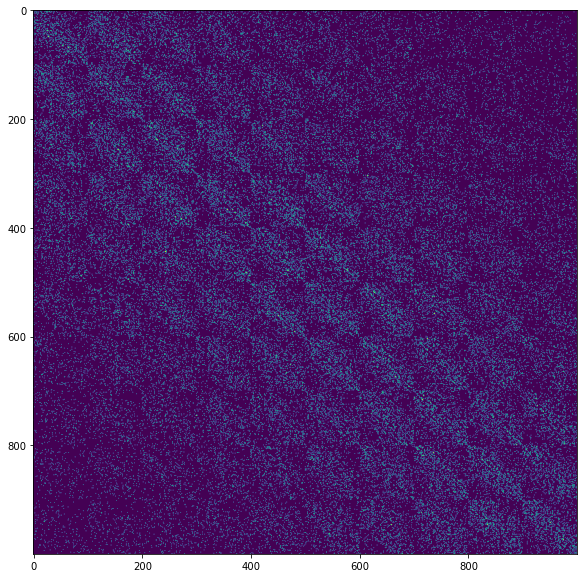

In [35]:
t0 = time()
n_neurons_side = 10
M = np.zeros((n_neurons_side**3, n_neurons_side**3))
idx = np.indices((n_neurons_side, n_neurons_side, n_neurons_side))
indices = np.array([[[(y__, x__, z__) for x__, y__, z__ in zip(x_, y_, z_)] for x_, y_, z_ in zip(x, y, z)] for x,y, z in zip(idx[0], idx[1], idx[2])]).reshape([-1, 3])
t1 = time()
def init_connection(i, j, c, lbd):
    posi = indices[i]
    posj = indices[j]
    d = np.linalg.norm(posi-posj)
    return 1 if np.random.rand() < c*np.exp(-d/lbd**2) else 0

types = ["ex" if np.random.rand() < 0.8 else "inh" for i in range(n_neurons_side**3)]
def init_tw(i, j):
    if types[i] == "ex" and types[j]=="ex":
        return 0.3
    elif types[i] == "ex" and types[j] == "inh":
        return 0.2
    elif types[i] == "inh" and types[j] == "ex":
        return 0.4
    elif types[i] == "inh" and types[j] == "inh":
        return 0.1
C = np.array([[init_tw(i, j) for i in range(M.shape[1])] for j in range(M.shape[0])])
lbd = 2
M = np.array([[init_connection(i, j, C[i, j], lbd) for i in range(M.shape[1])] for j in range(M.shape[0])])
t2 = time()
plt.figure(figsize=(15, 10))

plt.imshow(M)
t3 = time()
print(t1-t0, t2-t1, t3-t2)

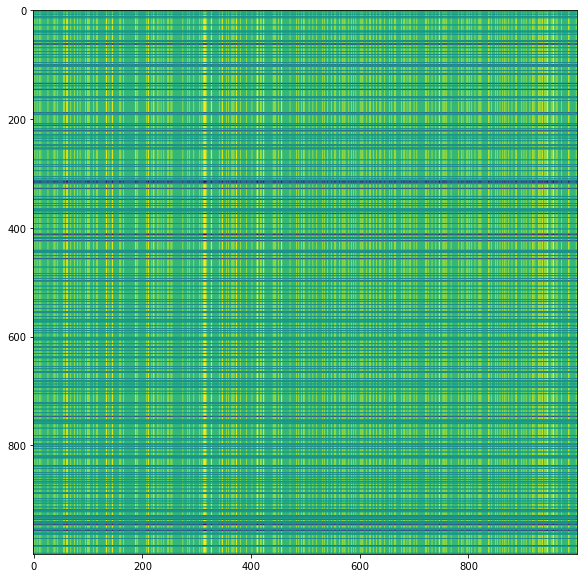

In [37]:
plt.figure(figsize=(15, 10))
plt.imshow(C)